In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
adult = pd.read_csv("/home/gautam/airflow/projects/Project Census Income/Data-sets/adult.csv")

In [3]:
census_income = pd.read_csv("/home/gautam/airflow/projects/Project Census Income/Data-sets/census-income (7).csv")

In [4]:
pop_data = pd.read_csv("/home/gautam/airflow/projects/Project Census Income/Data-sets/popdata (3).csv")

In [5]:
adult.keys()

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
census_income.keys()

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' '],
      dtype='object')

In [7]:
pop_data.keys()

Index(['value', 'date'], dtype='object')

In [8]:
census_income.columns = census_income.columns.str.strip()

In [9]:
print("Missing values in adult dataset:")
print(adult.isnull().sum())

Missing values in adult dataset:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [10]:
categorical_cols = adult.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    adult[col] = encoder.fit_transform(adult[col])

In [11]:
X = adult.drop(columns=['income'])  # Features
y = adult['income']  # Target variable

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [15]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.8272085167366158
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7479
           1       0.71      0.45      0.55      2290

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.82      0.83      0.81      9769

Confusion Matrix:
[[7054  425]
 [1263 1027]]

Decision Tree Performance:
Accuracy: 0.813798751151602
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7479
           1       0.60      0.62      0.61      2290

    accuracy                           0.81      9769
   macro avg       0.74      0.75      0.74      9769
weighted avg       0.82      0.81      0.82      9769

Confusion Matrix:
[[6521  958]
 [ 861 1429]]

Random Forest Performance:
Accuracy: 0.8652881564131436
              precision    recall  f1-score   support

           0       0.90  

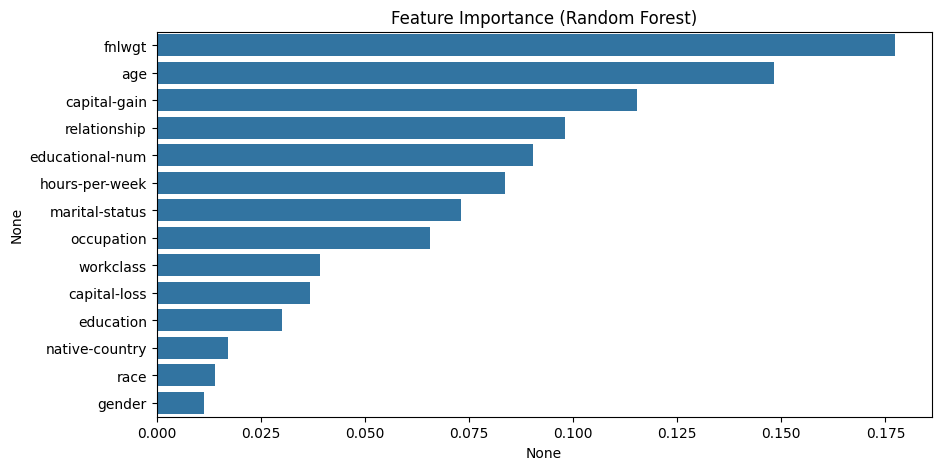

In [16]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance (Random Forest)")
plt.show()